# Homework 2 (Programming Part)

## Problem 1

Suppose you are the CEO of a food truck company and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file foodtruck.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10000s) and the second column is the profit of a food truck in that city (in $10000s). A negative value for profit indicates a loss.

(a) Show a scatter plot of the data (profit vs population)

(b) Train a linear regression model with a non-iterative method. Show the minimum cost (RSS).

(c) Train a linear regression model with stochastic gradient descent (without regularization). Show the minimum cost and check the manual of the class you used to see if you can find the number of epochs before the program is finished.

(d) Make predictions for profits in areas of 35000 and 70000 people.

(e) Make a plot of the regression line along with the training data.

In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

%matplotlib inline

(a) Show a scatter plot of the data (profit vs population)

In [3]:
# Read in the Data
food_data = pd.read_csv('foodtruck.txt', header=None)
# See what the data looks like
food_data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
food_data.tail()


,0,1
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [5]:
#City Populations
x = food_data.iloc[:,0]
x.head()

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: 0, dtype: float64

In [6]:
#Food truck profits
y = food_data.iloc[:,1]
y.head()


0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64

Text(0, 0.5, 'Food Truck Profit in 10,000s')

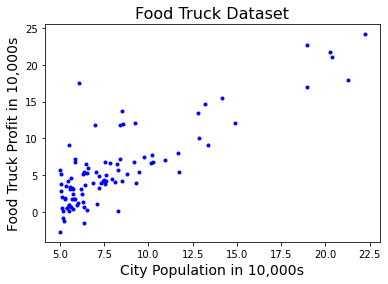

In [7]:
plt.plot(x, y, '.', color='b');
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)

(b) Train a linear regression model with a non-iterative method. Show the minimum cost (RSS).

In [8]:
# Create the X matrix
X = np.c_[np.ones(97), x]
# Solve for beta
beta_hat = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print('beta_hat = ', beta_hat)

beta_hat =  [-3.89578088  1.19303364]


In [9]:
# Create two new x values
x_new = np.array([0, 2])
# Create the X matrix for the new x values:
X_new = np.c_[np.ones(2), x_new]
# Now make predictions:
y_pred = np.dot(X_new, beta_hat)
print('y_pred = ', y_pred)

y_pred =  [-3.89578088 -1.50971359]


In [10]:
# Construct a linear model
lin_reg = sklearn.linear_model.LinearRegression()
# Train the linear model. Note here the input x should be a 2d-array
lin_reg.fit(np.c_[x], y)
print('parameters = ', lin_reg.intercept_, lin_reg.coef_)

# Make new predictions. Again the input x should be a 2d-array
lin_reg.predict(np.c_[x_new])

parameters =  -3.89578087831185 [1.19303364]


array([-3.89578088, -1.50971359])

In [11]:
def cost(beta_hat, X, y):
    predictions = np.dot(X,beta_hat.T)
    squared_errors = np.square(predictions-y)
    return np.sum(squared_errors)/(2*len(y))

print('The Minimum Cost is:', cost(beta_hat,X, y))

The Minimum Cost is: 4.476971375975179


(c) Train a linear regression model with stochastic gradient descent (without regularization). Show the minimum cost and check the manual of the class you used to see if you can find the number of epochs before the program is finished.


In [12]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(np.c_[x], y)

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-6.06146916e+09]), array([8.93692027e+08]))

In [14]:
print('The number of epochs before the program is finished is the following:', sgd_reg.n_iter_)

The number of epochs before the program is finished is the following: 7


In [15]:
N = 97
# Set the number of epochs
n_epochs = 6
def learning_schedule(t):
    t0 = 5
    t1 = 50
    return t0 / (t + t1)
beta = np.random.randn(2)
for epoch in range(n_epochs):
    for i in range(N):
        rand_index = np.random.randint(N)
        Xi = X[rand_index, :]
        yi = y[rand_index]
        grad = 2*Xi.T.dot(Xi.dot(beta)-yi)
        eta = learning_schedule(epoch*N+i)
        beta = beta - eta*grad

In [16]:
# Print out the final results:
print(beta)

[ 4.28084620e+87 -1.29167088e+88]


In [17]:
print()
print('The Minimum Cost is the following:', cost(beta,X, y))


The Minimum Cost is the following: 6.348743714989344e+177


(d) Make predictions for profits in areas of 35000 and 70000 people.

In [18]:
lin_reg.predict([[3.5],[7]])

array([0.27983688, 4.45545463])

In [19]:
sgd_reg.predict([[3.5],[7]])

array([-2.93354707e+09,  1.94375030e+08])

(e) Make a plot of the regression line along with the training data.

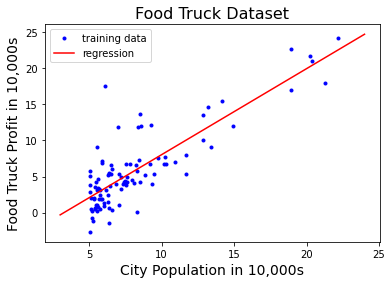

In [20]:
plt.plot(x, y, '.', color='b', label='training data');
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)

plt.plot(np.array([3, 24]), lin_reg.predict(np.c_[np.array([3,24])]), color='r', label='regression')
plt.legend();

## Problem 2

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. 

The file houseprice.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house.

(a) Train a linear regression model with SGD and print out the minimum cost (RSS).\\

(b) Train a linear regression model with a non-iterative method and print out the minimum cost (RSS).\\

(c) Do the minimum costs agree?\\

(d) Scale you feature matrix using sklearn.preprocessing.StandardScaler. See the manual about what it is and how to use it. Train a linear regression model with SGD using the scaled features. Print out the minimum cost and what do you find?

(a) Train a linear regression model with SGD and print out the minimum cost (RSS).

In [21]:
# Read in the Data
house_data = pd.read_csv('houseprice.txt', header=None)
# See what the data looks like
house_data.head()

house_data.tail()

,0,1,2
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [22]:
# create the feature matrix
X_H = house_data.iloc[:, :2]
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
# Create Target Vector
y_H = house_data.iloc[:, -1]
y.head()

In [ ]:
sgd_reg_house = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg_house.fit(np.c_[X], y)

In [ ]:
sgd_reg_house.intercept_, sgd_reg_house.coef_

In [ ]:
# Create the X matrix
X_house = np.c_[np.ones(len(y)), X_H]
# Solve for beta
beta_hat = np.linalg.inv(np.dot(X_house.T, X_house)).dot(X_house.T).dot(y)
print('beta_hat = ', beta_hat)

y_new_house = np.c_[y_H]

In [ ]:
Beta_House = np.c_[[sgd_reg_house.intercept_]], [sgd_reg_house.coef_[0]], [sgd_reg_house.coef_[0]]



In [ ]:
def cost(Beta_House, X_house, y_new_house):
    predictions = np.dot(X,beta_hat.T)
    squared_errors = np.square(predictions-y)
    return np.sum(squared_errors)/(2*len(y))

In [ ]:
Beta_House_1 = np.squeeze(np.asarray(Beta_House))
X_house_1 = np.squeeze(np.asarray(X_house))
y_new_house_1 = np.squeeze(np.asarray(y_new_house))

In [ ]:
print('The minimum Cost is:', cost(Beta_House_1, X_house_1, y_new_house_1))

(b) Train a Linear Regression Model with a non-iterative Method and print out the Minimum Cost (RSS).

In [ ]:

# Solve for beta
beta_hat_house = np.linalg.inv(np.dot(X_house.T, X_house)).dot(X_house.T).dot(y_H)
print('beta_hat = ', beta_hat)

In [ ]:
# Construct a linear model
lin_reg_house = sklearn.linear_model.LinearRegression()
# Train the linear model. Note here the input x should be a 2d-array
lin_reg_house.fit(np.c_[X_H], y_H)
print('parameters = ', lin_reg.intercept_, lin_reg.coef_)


In [ ]:
beta_hat_house_1 = np.squeeze(np.asarray(beta_hat_house))

In [ ]:
print('The minimum Cost is:', cost(beta_hat_house,X_house,y_new_house))


(c) Do the minimum costs agree?\\

Yes, the minimum costs agreed.

(d) Scale you feature matrix using sklearn.preprocessing.StandardScaler. See the manual about what it is and how to use it. Train a linear regression model with SGD using the scaled features. Print out the minimum cost and what do you find?

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_H)
scaler.transform(X_H)

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [24]:
sgd_reg_house_sc = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg_house_sc.fit(np.c_[scaler.transform(X_H)], y_H)

NameError: name 'y_H' is not defined

In [25]:
sgd_reg_house.intercept_, sgd_reg_house.coef_

NameError: name 'sgd_reg_house' is not defined

In [26]:
N = 47
# Set the number of epochs
n_epochs = 50
def learning_schedule(t):
    t0 = 5
    t1 = 50
    return t0 / (t + t1)
beta = np.random.randn(2)
for epoch in range(n_epochs):
    for i in range(N):
        rand_index = np.random.randint(N)
        Xi = X[rand_index, :]
        yi = y[rand_index]
        grad = 2*Xi.T.dot(Xi.dot(beta)-yi)
        eta = learning_schedule(epoch*N+i)
        beta = beta - eta*grad

In [27]:
# Print out the final results:
print(beta)

[-9.67304810e+78  8.36540007e+77]


In [28]:
print()
print('The Minimum Cost is the following:', cost(beta,scaler.transform(X_H), y_H))

NameError: name 'y_H' is not defined

## Problem 3

We want to implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model. The data are stored in QA.txt. The first two columns are the results for the two tests. The third column is the acceptance (1) or rejection (0) of the microchips.

(a) Visualize the data; different classes should have different colors and markers.

(b) Use polynomial features of degree 6 for the logistic regression. Use L2 regulariztion where $\alpha=1$. Use the following function plot_decision_boundary to plot the decision boundary.

(c) Repeat (b) using $\alpha=0$ and $\alpha=100$

(d) What do you find for the three cases?

In [29]:
def plot_decision_boundary(model, accepted, rejected):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -1, 1.5
    y_min, y_max = -0.8, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = log_reg.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], marker='x')
    plt.scatter(rejected.iloc[:, 0], rejected.iloc[:, 1], marker='s')
    plt.legend(['Accepted', 'Rejected'])
    plt.xlabel('Test score 1')
    plt.ylabel('Test score 2');

(a) Visualize the data; different classes should have different colors and markers.

In [30]:
# Read in the Data
QA_data = pd.read_csv('QA.txt', header=None)
# See what the data looks like
QA_data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [31]:
# create the feature matrix
X_QA = QA_data.iloc[:, :2]
X_QA.head()

,0,1
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [32]:
# Create Target Vector
y_QA = QA_data.iloc[:, -1]
y_QA.head()

0    1
1    1
2    1
3    1
4    1
Name: 2, dtype: int64

In [33]:
# filter out the accepted Microchips:
accepted = QA_data[QA_data[2]==1]
accepted.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [34]:
# filter out the rejected Microchips:
not_accepted = QA_data[QA_data[2]==0]
not_accepted.head()

,0,1,2
58,0.18376,0.93348,0
59,0.22408,0.77997,0
60,0.29896,0.61915,0
61,0.50634,0.75804,0
62,0.61578,0.72880,0


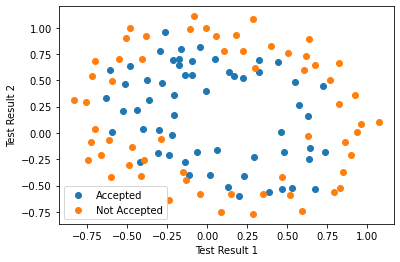

In [35]:
# Visualize the data
plt.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], label='Accepted')
plt.scatter(not_accepted.iloc[:, 0], not_accepted.iloc[:, 1], label='Not Accepted')
plt.legend()
plt.xlabel('Test Result 1')
plt.ylabel('Test Result 2');

(b) Use polynomial features of degree 6 for logistic regression. Use L2 Regularization where $\alpha = 1$. Use the following function plot_decision_boundary to plot the decision boundary.

In [36]:
# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_QA, y_QA)
# print model parameters:
print('model parameters: ', log_reg.intercept_, log_reg.coef_)
# Predict for the training data
y_pred = log_reg.predict(X_QA)
print(y_pred)

model parameters:  [-0.0174072] [[-0.26541433 -0.01162176]]
[0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0]


In [37]:
# Check accuracy:
accuracy = accuracy_score(y_QA,y_pred)
print('accuracy = ', accuracy)

accuracy =  0.5423728813559322


In [38]:
poly=PolynomialFeatures(degree = 6)
X_Poly = poly.fit_transform(X_QA)

print(X_Poly)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


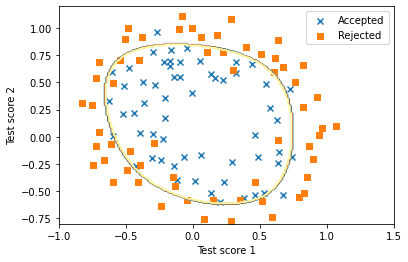

In [39]:
# Train the model
log_reg = LogisticRegression(penalty = 'l2', C = 1.0)
log_reg.fit(X_Poly, y_QA)
plot_decision_boundary(log_reg, accepted, not_accepted)

(c) Repeat (b) using $\alpha = 0$ and $\alpha = 100$

In [41]:
# Train the model
# Use alpha = 0
log_reg = LogisticRegression(penalty = 'l2', C = 0.0)
log_reg.fit(X_Poly, y_QA)
plot_decision_boundary(log_reg, accepted, not_accepted)

ZeroDivisionError: float division by zero

C:\Users\12563\OneDrive\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


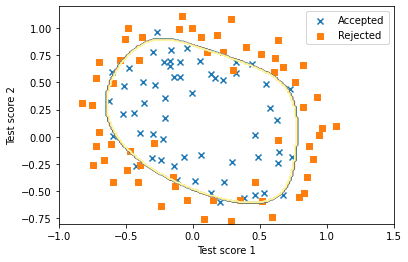

In [42]:
# Train the model
log_reg = LogisticRegression(penalty = 'l2', C = 100.0)
log_reg.fit(X_Poly, y_QA)
plot_decision_boundary(log_reg, accepted, not_accepted)

In [386]:
def plot_decision_boundary(model, accepted, rejected):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -1, 1.5
    y_min, y_max = -0.8, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = log_reg.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], marker='x')
    plt.scatter(rejected.iloc[:, 0], rejected.iloc[:, 1], marker='s')
    plt.legend(['Accepted', 'Rejected'])
    plt.xlabel('Test score 1')
    plt.ylabel('Test score 2');

(d) What do you find for the three cases? 



When $\alpha = 0.0$ we do not obtain a plot. When $\alpha = 1.0$ and $\alpha = 100.0$ the decision boundarys look pretty smilar. When $\alpha = 1.0$ the decision boundary separates the Accepted and Rejected values fairly well.